In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv(r"E:\PythonCore\datafiles\50_Startups.csv")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [85]:
#Exploratory Data Analysis (EDA)

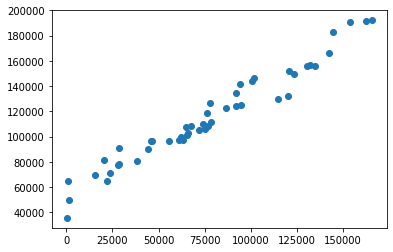

In [86]:
plt.scatter(df['RDSpend'], df['Profit'])
plt.show()

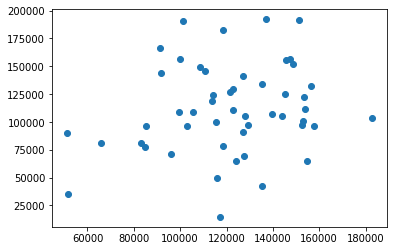

In [87]:
plt.scatter(df['Administration'], df['Profit'])
plt.show()

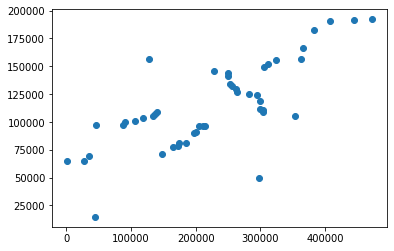

In [88]:
plt.scatter(df['MarketingSpend'], df['Profit'])
plt.show()

In [89]:
df.drop(columns='State').corr()['Profit']

RDSpend           0.977401
Administration    0.200717
MarketingSpend    0.747434
Profit            1.000000
Name: Profit, dtype: float64

In [90]:
df.corr()
# correlation between numerical columns

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.200717
MarketingSpend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.200717,0.747434,1.000000


In [91]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [92]:
from scipy.stats import f_oneway

In [93]:
# Finds out the Profit data for each State as a list
CategoryGroupLists=df.groupby('State')['Profit']

In [94]:
type(CategoryGroupLists)

pandas.core.groupby.generic.SeriesGroupBy

In [95]:
CategoryGroupLists.groups

{'California': [1, 6, 9, 11, 13, 16, 20, 25, 32, 34, 37, 39, 40, 42, 44, 47, 49], 'Florida': [2, 4, 7, 10, 12, 14, 18, 22, 23, 26, 28, 30, 33, 36, 41, 46], 'New York': [0, 3, 5, 8, 15, 17, 19, 21, 24, 27, 29, 31, 35, 38, 43, 45, 48]}

In [96]:
ListOfCats = CategoryGroupLists.apply(list)

In [97]:
type(ListOfCats)

pandas.core.series.Series

In [98]:
ListOfCats

State
California    [191792.06, 156122.51, 149759.96, 144259.4, 13...
Florida       [191050.39, 166187.94, 155752.6, 146121.95, 14...
New York      [192261.83, 182901.99, 156991.12, 152211.77, 1...
Name: Profit, dtype: object

In [99]:
len(ListOfCats)

3

In [100]:
# Performing the ANOVA test
# H0 = There is no correlation between Nominal and continuous variable
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*ListOfCats)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.5667290310967406


In [101]:
df.isna().sum()

RDSpend           2
Administration    0
MarketingSpend    3
State             0
Profit            0
dtype: int64

In [102]:
df['RDSpend'].fillna(value=df['RDSpend'].mean(), inplace=True)
df['MarketingSpend'].fillna(value=df['MarketingSpend'].mean(), inplace=True)

In [103]:
df.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

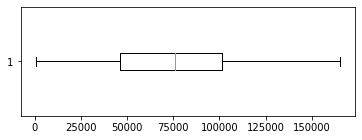

In [104]:
#check if there are outliers
plt.figure(figsize=(6,2))
plt.boxplot(df['RDSpend'], vert=False);

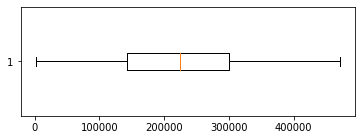

In [105]:
plt.figure(figsize=(6,2))
plt.boxplot(df['MarketingSpend'], vert=False);

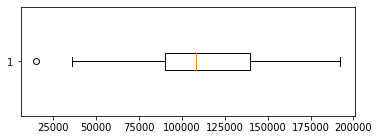

In [106]:
plt.figure(figsize=(6,2))
plt.boxplot(df['Profit'], vert=False);

#### formula for outlier
#### => anything above Q3 + 1.5*IQR
#### => anything below  Q1 - 1.5*IQR

In [107]:
IQR = np.percentile(df['Administration'].values,75)-np.percentile(df['Administration'].values,25)
mask_up = df['Administration'] > np.percentile(df['Administration'].values,75)+ 1.5 * IQR
mask_down = df['Administration'] < np.percentile(df['Administration'].values,25) - 1.5 * IQR

In [108]:
df['Administration'][mask_up]

Series([], Name: Administration, dtype: float64)

In [109]:
df['Administration'][mask_down]

Series([], Name: Administration, dtype: float64)

In [110]:
#Data Preprocessing

In [111]:
# Take care of null values
# Fill null values with mean in numerical columns and with mode in categorical columns

In [112]:
# Take care of categorical column, do LabelEncoding
# check if nominal or ordinal, if nominal do 1 more step of One HotEncoding

In [113]:
cols =[0,2]

In [114]:
X = df.iloc[:,cols].values

In [115]:
np.set_printoptions(suppress=True) # to suppress exponential output

In [116]:
y = df.iloc[:,-1].values

In [117]:
y.shape

(50,)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40, 2) (10, 2) (40,) (10,)


In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
model.coef_

array([0.64404479, 0.08867585])

In [123]:
model.intercept_

41569.401101852185

In [124]:
## model validity

In [125]:
yhat = model.predict(X_test)
yhat.shape

(10,)

In [126]:
yhat

array([127527.03116914, 123221.89778095,  89577.76312834,  68763.49289402,
       126812.21279052, 189897.54748263,  75411.28015454, 124176.58472428,
        93322.85558715, 146836.75615507])

In [127]:
y_test

array([146121.95, 134307.35,  99937.59,  49490.75, 124266.9 , 192261.83,
        78239.91, 141585.52, 101004.64, 152211.77])

In [128]:
from sklearn.metrics import r2_score

In [129]:
r2_score(y_test, yhat)

0.9098660010693188

In [130]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

135846409.75559956